In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [3]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(224,224))


Found 101965 images belonging to 2 classes.


In [4]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(224,224))


Found 20076 images belonging to 2 classes.


In [5]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (224,224))
        img = img / 255.0
        return img

In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [7]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='sigmoid'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 24,900,482
Trainable params: 1,312,770
Non-trainable params: 23,587,712
_________________________________________________________________


In [31]:
resnet_model.compile(optimizer=Adam(lr=3e-4),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(trainingdt, validation_data=testingdt, epochs=10, steps_per_epoch=100, validation_steps=10)

Epoch 1/10
100/100 [==============================] - 376s 4s/step - loss: 0.9285 - accuracy: 0.6816 - val_loss: 0.5608 - val_accuracy: 0.7500
Epoch 2/10
100/100 [==============================] - 661s 7s/step - loss: 0.6214 - accuracy: 0.7091 - val_loss: 0.5271 - val_accuracy: 0.8000
Epoch 3/10
100/100 [==============================] - 688s 7s/step - loss: 0.5401 - accuracy: 0.7644 - val_loss: 0.5510 - val_accuracy: 0.7469
Epoch 4/10
100/100 [==============================] - 643s 6s/step - loss: 0.5318 - accuracy: 0.7616 - val_loss: 0.5370 - val_accuracy: 0.7656
Epoch 5/10
100/100 [==============================] - 628s 6s/step - loss: 0.5072 - accuracy: 0.7822 - val_loss: 0.4768 - val_accuracy: 0.8156
Epoch 6/10
100/100 [==============================] - 604s 6s/step - loss: 0.5337 - accuracy: 0.7588 - val_loss: 0.4867 - val_accuracy: 0.7844
Epoch 7/10
100/100 [==============================] - 614s 6s/step - loss: 0.4640 - accuracy: 0.8006 - val_loss: 0.4645 - val_accuracy: 0.7937

In [35]:
resnet_model.save('resnet50SVMsigmoid.h5')

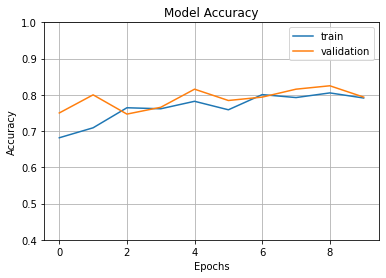

In [36]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

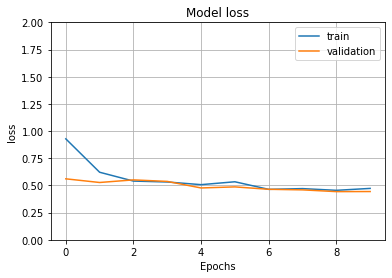

In [37]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=2)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
y_actual= testingdt.labels
pred= resnet_model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(pred, y_actual, target_names=['fake(class0)', 'real(class1)']))

ModuleNotFoundError: No module named 'sklearn'

In [10]:
pip install sklearn


  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=deac0da7f2f38e2346905d21e4ad1985ea1392c383947c48937c555d85e9256f
  Stored in directory: c:\users\viola\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [13]:
y_actual= testingdt.labels
pred= resnet_model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('always')
print(classification_report(pred, y_actual, target_names=['fake(class0)', 'real(class1)']))

              precision    recall  f1-score   support

fake(class0)       0.00      0.00      0.00         0
real(class1)       1.00      0.50      0.67     20076

    accuracy                           0.50     20076
   macro avg       0.50      0.25      0.33     20076
weighted avg       1.00      0.50      0.67     20076



C:\Users\viola\anaconda3\envs\kerass\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viola\anaconda3\envs\kerass\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\viola\anaconda3\envs\kerass\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_actual= testingdt.labels
pred= model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
cm=confusion_matrix(y_actual,pred)
print(cm)
labels = ["Fake", "real"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

NameError: name 'model' is not defined